# Importing Libraries

In [22]:
import csv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files


# Download Dataset

* https://www.kaggle.com/datamunge/sign-language-mnist/home


In [2]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [3]:
def get_data(filename):
  with open(filename) as training_file:
    csv_reader = csv.reader(training_file, delimiter=',')
    first_line = True
    temp_images = []
    temp_labels = []

    for row in csv_reader:
      if first_line:
        print('Ignoring first line')
        first_line = False
      else:
        temp_labels.append(row[0])
        image_data = row[1:785]
        image_data_as_array = np.array_split(image_data, 28)
        temp_images.append(image_data_as_array)

    images = np.array(temp_images).astype('float')
    labels = np.array(temp_labels).astype('float')
  
  return images, labels

In [6]:
train_images, train_labels = get_data('sign_mnist_train.csv')
test_images, test_labels = get_data('sign_mnist_test.csv')

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


Ignoring first line
Ignoring first line
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


# Preprocess Data

In [8]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [10]:
print(train_images.shape)
print(test_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [11]:
train_datagen = ImageDataGenerator(
                                    rescale=1. / 255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
                                        rescale=1. / 255)


In [12]:
train_generator = train_datagen.flow(train_images,
                                     train_labels,
                                     batch_size=32)

validation_generator = validation_datagen.flow(test_images,
                                               test_labels,
                                               batch_size=32)

# Build & Train the Model

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)
])

In [15]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [18]:
len(train_images)/32, len(train_generator)

(857.96875, 858)

In [19]:
history = model.fit(train_generator,
                    epochs=15,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator))


Epoch 1/15
858/858 [==============================] - 54s 62ms/step - loss: 2.8336 - accuracy: 0.1383 - val_loss: 1.9945 - val_accuracy: 0.3740
Epoch 2/15
858/858 [==============================] - 53s 62ms/step - loss: 2.1394 - accuracy: 0.3213 - val_loss: 1.6524 - val_accuracy: 0.4172
Epoch 3/15
858/858 [==============================] - 55s 64ms/step - loss: 1.8149 - accuracy: 0.4144 - val_loss: 1.3073 - val_accuracy: 0.5230
Epoch 4/15
858/858 [==============================] - 54s 63ms/step - loss: 1.5847 - accuracy: 0.4858 - val_loss: 1.2076 - val_accuracy: 0.5636
Epoch 5/15
858/858 [==============================] - 54s 63ms/step - loss: 1.3953 - accuracy: 0.5460 - val_loss: 0.8795 - val_accuracy: 0.6758
Epoch 6/15
858/858 [==============================] - 54s 62ms/step - loss: 1.2877 - accuracy: 0.5723 - val_loss: 0.8875 - val_accuracy: 0.6677
Epoch 7/15
858/858 [==============================] - 54s 62ms/step - loss: 1.1909 - accuracy: 0.6073 - val_loss: 0.7420 - val_accuracy:

In [20]:
model.evaluate(test_images, test_labels)

225/225 [==============================] - 3s 14ms/step - loss: 186.2269 - accuracy: 0.5611


[186.22694396972656, 0.5610708594322205]

# Plot Loss & Accuracy

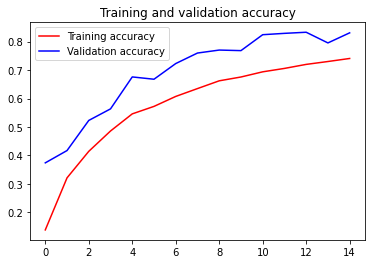

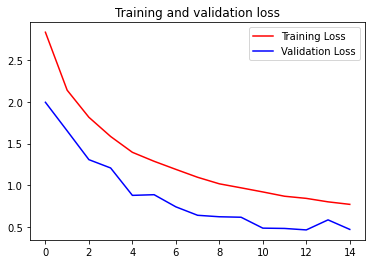

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()